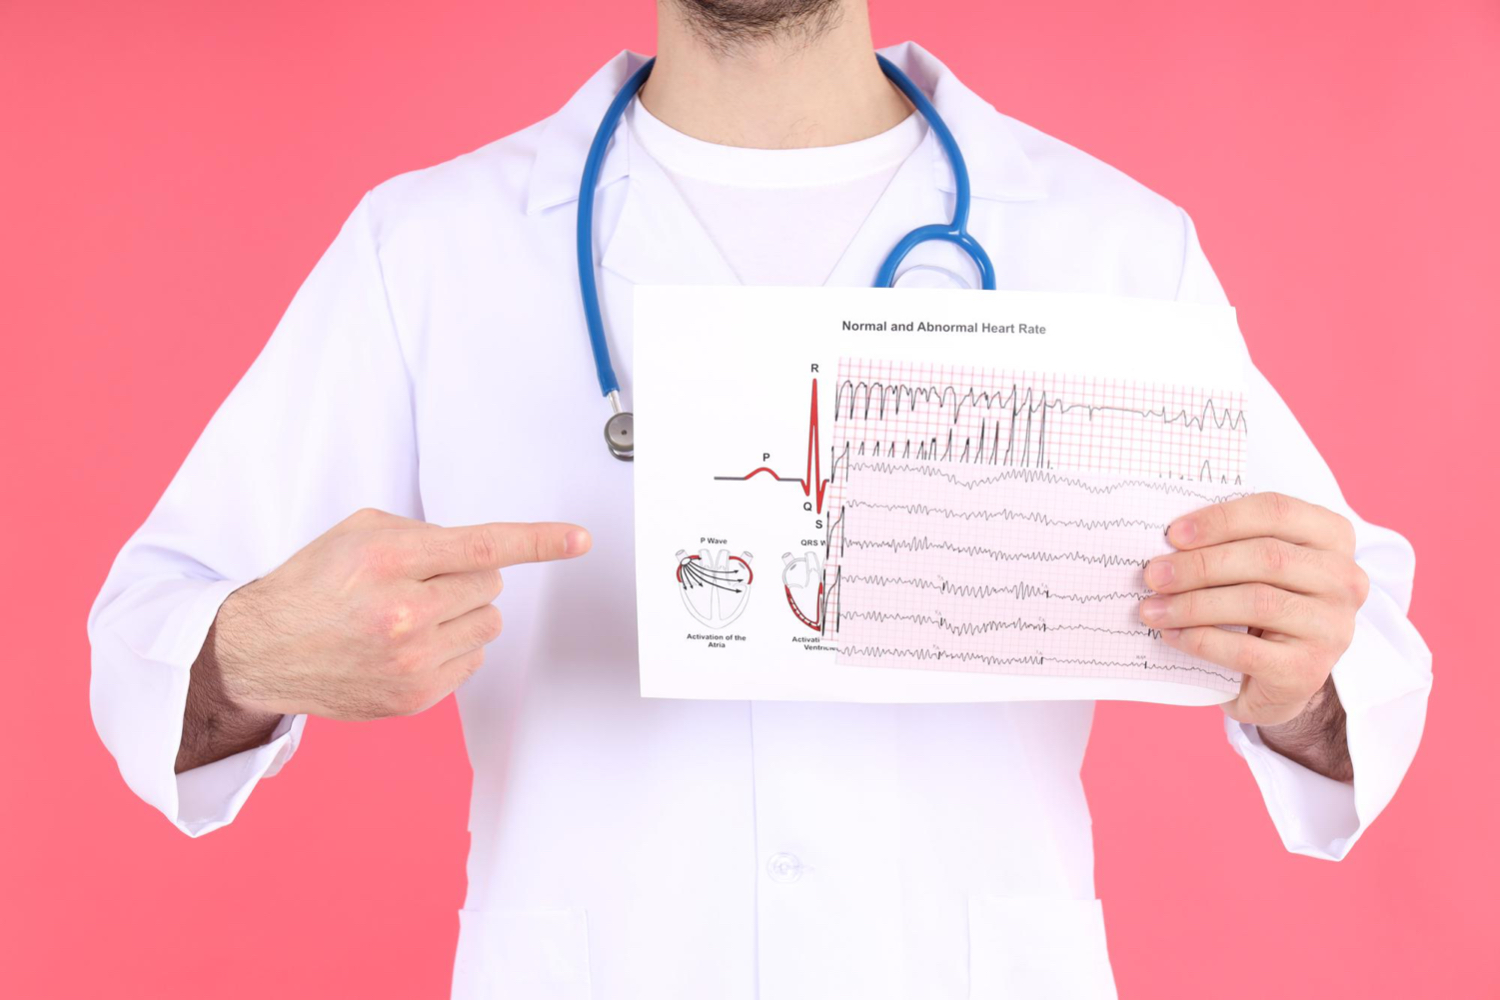

# **1. Detection of myocardial infarction**

## 1.1. Introduction
Данный набор данных содержит информацию о пациентах, у которых возможны сердечные заболевания.

*Модель машинного обучения будем строить для определения сердечных заболеваний.*

## 1.2. Description of the dataset🧾
*   Возраст: возраст (в годах)
*   Пол: пол (1 = мужской; 0 = женский)
*   ChestPain: тип боли в груди

  1.   типичная стенокардия (присутствуют все критерии)
  2.   атипичная стенокардия (удовлетворены два из трех критериев)
  3.   боль (удовлетворено менее одного критерия)
  4.   бессимптомно (ни один из критериев не удовлетворен)


*   Restbps: Артериальное давление в покое (в мм рт. при поступлении в больницу)
*   Chol: Холестирин: холестерин в мг/дл
*   Fbs: уровень сахара в крови натощак > 120 мг/дл (вероятно диабет)
  1. 1 = верно
  2. 0 = неправильно или определенная гипертрофия левого желудочка по критериям Эстеса.
*   RestECG: ЭКГ в покое: результаты электрокардиограммы в покое
  1. 0: нормальное
  2. 1: имеется аномалия ST-T (инверсия зубца Т и/или элевация или депрессия сегмента ST > 0,05 мВ)
  3. 2: вероятное или определенное левое гипертрофия желудочков по критериям Эстеса
*   MaxHR: Максимальное число ударов в минуту, которое может достичь сердце во время тотальной напряженной тренировки.
*   Exang: стенокардия, вызванная нагрузкой (1 = да; 0 = нет)
*   Oldpeak: депрессия ST, вызванная нагрузкой, по сравнению с состоянием покоя (в мм, полученная путем вычитания точек нижнего сегмента ST во время нагрузки и отдыха)
*   Slope: наклон пикового сегмента ST при нагрузке, аномалии ST-T считаются важным индикатором для выявления наличия ишемии
  1. 1: восходящий
  2. 2: плоский
  3. 3: нисходящий
*   Ca: количество крупных сосудов (0-3) окрашены при рентгеноскопии. К основным сердечным сосудам относятся: аорта, верхняя полая вена, нижняя полая вена, легочная артерия (бедная кислородом кровь --> легкие), легочные вены (богатая кислородом кровь --> сердце) и коронарные артерии (снабжают кровью ткани сердца).
*   THAL:
  1. 0 = нормальный;
  2. 1 = фиксированный дефект (ткань сердца не может усваивать таллий как при стрессе, так и в покое);
  3. 2 = обратимый дефект (ткань сердца не способна поглощать таллий только в части теста с физической нагрузкой)
*   Target: 0 = отсутствие заболевания, 1 = заболевание

На основе данных в 1-13 столбце (всех или частично) **предсказать значение 14 столбца (Target).**

# 2. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas.util.testing as tm
import warnings

from sklearn.pipeline import Pipeline
from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve, ShuffleSplit, cross_val_score, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge, Perceptron, LogisticRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier

warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


# 3. Initial Data Exploration

## 3.1. Reading Dataset

In [2]:
df = pd.read_csv('train.csv')

df.head(10).style.background_gradient(cmap='Greens')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,71,0,0,112,149,0,1,125,0,1.600000,1,0,2,1
1,58,0,0,170,225,1,0,146,1,2.800000,1,2,1,0
2,55,0,0,128,205,0,2,130,1,2.000000,1,1,3,0
3,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
4,59,1,0,140,177,0,1,162,1,0.000000,2,1,3,0
5,44,1,2,120,226,0,1,169,0,0.000000,2,0,2,1
6,51,1,0,140,298,0,1,122,1,4.200000,1,3,3,0
7,46,0,2,142,177,0,0,160,1,1.400000,0,0,2,1
8,66,1,1,160,246,0,1,120,1,0.000000,1,3,1,0
9,67,0,2,152,277,0,1,172,0,0.000000,2,1,2,1


## 3.2. Initial Data Exploration

In [3]:
print('\033[1m'+'Размерность датафрейма:'+'\033[0m')
print('*' * 30)
print('Количество строк:', df.shape[0])
print('Количество столбцов:', df.shape[1])
print('*' * 30)
print('\n')

print('\033[1m'+'Нулевые значения:'+'\033[0m')
print('*' * 30)
print(df.isna().sum())
print('*' * 30)
print('\n')

print('\033[1m'+'\nИнформация о датафрейме:\n'+'\033[0m')
df.info(memory_usage = False)

Размерность датафрейма:
******************************
Количество строк: 227
Количество столбцов: 14
******************************


Нулевые значения:
******************************
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
******************************



Информация о датафрейме:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       227 non-null    int64  
 1   sex       227 non-null    int64  
 2   cp        227 non-null    int64  
 3   trestbps  227 non-null    int64  
 4   chol      227 non-null    int64  
 5   fbs       227 non-null    int64  
 6   restecg   227 non-null    int64  
 7   thalach   227 non-null    int64  
 8   exang     227 non-null    int64  
 9   oldpeak  

In [4]:
print('\033[1m'+'Описательная статистика:'+'\033[0m')
df.describe().style.background_gradient(cmap='Greens')

Описательная статистика:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,54.251101,0.696035,0.995595,132.118943,247.202643,0.136564,0.515419,149.392070,0.317181,1.004846,1.392070,0.713656,2.312775,0.541850
std,8.827423,0.460984,1.041178,17.492323,51.799079,0.344145,0.526703,22.432604,0.466407,1.154684,0.610040,1.027041,0.633829,0.499347
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.500000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,165.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Экскурс о первичной информации о нашем наборе данных:**
1.   Из информации, которая на данный момент нам доступна, известно, что в датафрейме 227 строк и 14 столбцов;
2.   Отсутствуют нулевые значения;
3.   Некоторые типы данных не совпадают с остальными.



## 3.3. Visualization

(0.0, 600.0)

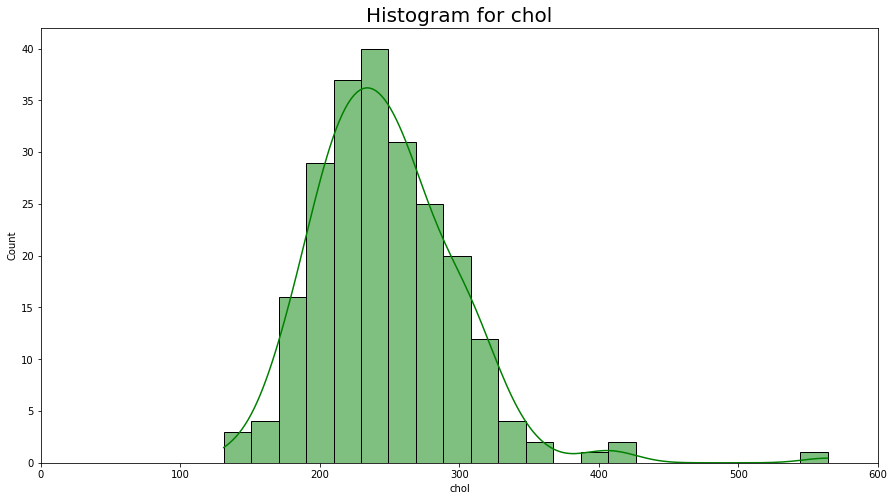

In [5]:
var = 'chol'
f, ax = plt.subplots(figsize=(15,8))
sns.histplot(df[var], color='green', kde=True)
plt.title('Histogram for chol', size=20)
plt.xlim([0,600])

(0.0, 250.0)

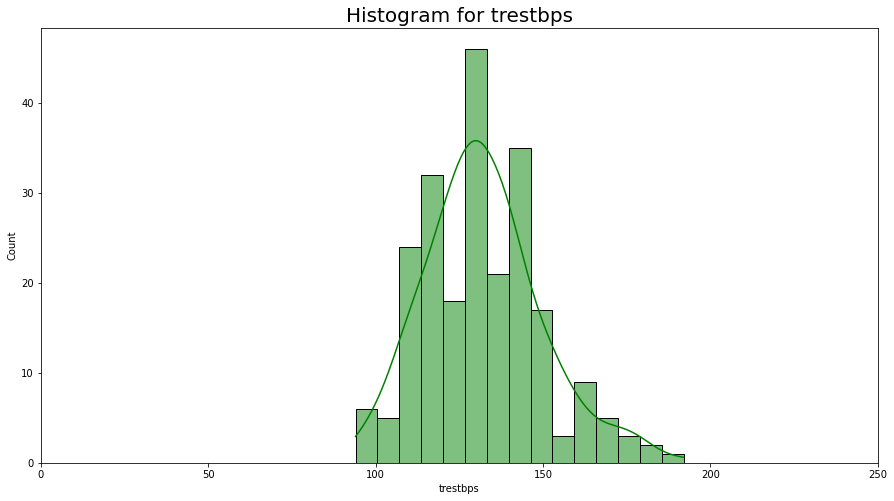

In [6]:
var = 'trestbps'
f, ax = plt.subplots(figsize=(15,8))
sns.histplot(df[var], color='green', kde=True)
plt.title('Histogram for trestbps', size=20)
plt.xlim([0,250])

(0.0, 300.0)

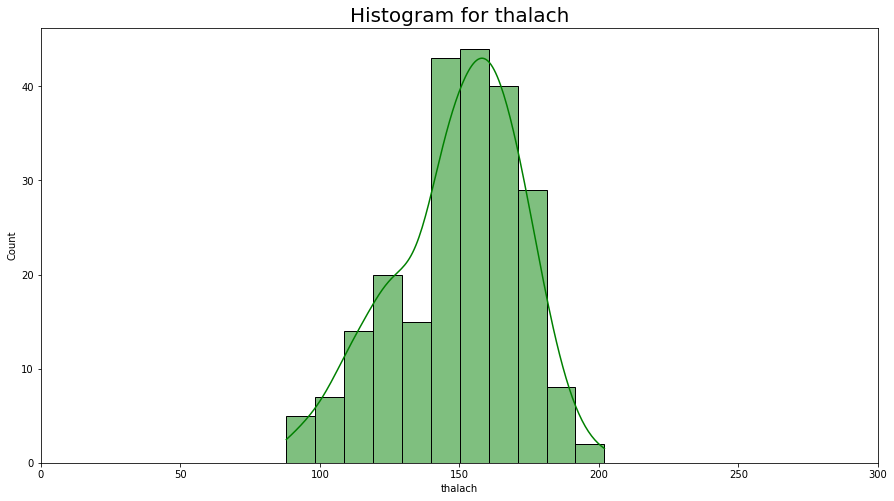

In [7]:
var = 'thalach'
f, ax = plt.subplots(figsize=(15,8))
sns.histplot(df[var], color='green', kde=True)
plt.title('Histogram for thalach', size=20)
plt.xlim([0, 300])

(0.0, 10.0)

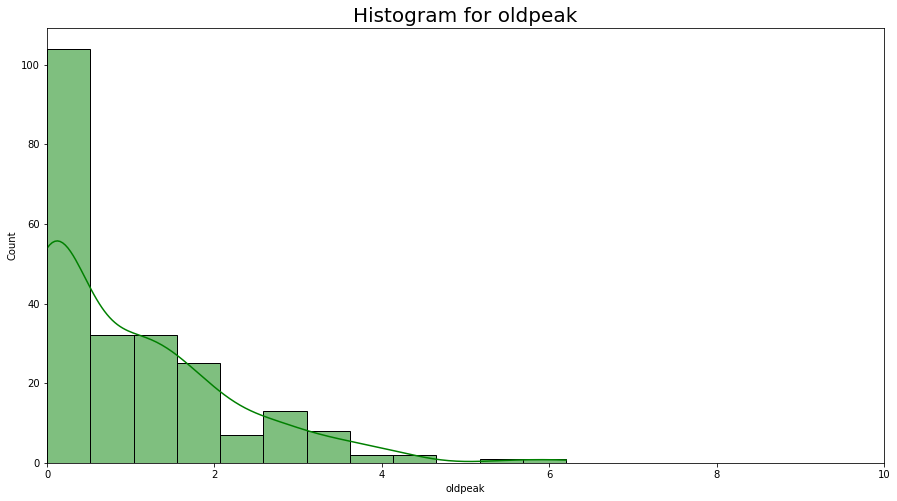

In [8]:
var = 'oldpeak'

f, ax = plt.subplots(figsize=(15,8))
sns.histplot(df[var], color='green', kde=True)
plt.title('Histogram for oldpeak', size=20)
plt.xlim([0,10])

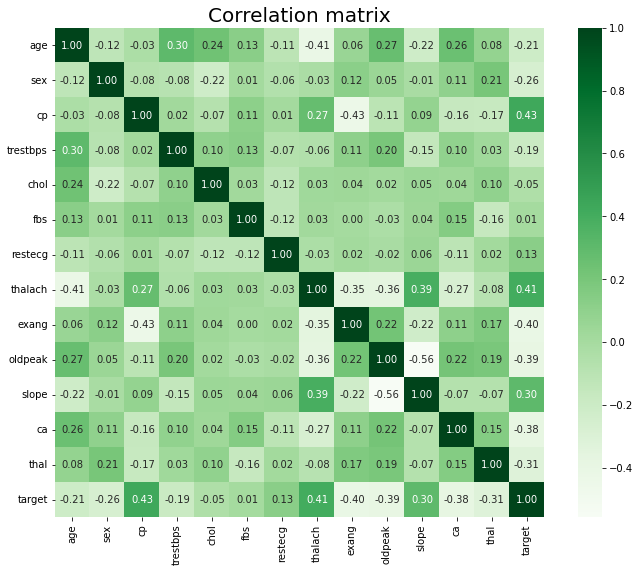

In [9]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
plt.title('Correlation matrix', size=20)
sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', cmap="Greens")

## 3.4. Clearing data

In [10]:
df_clean = np.log(df[['thalach', 'trestbps', 'chol']])
df_clean

,thalach,trestbps,chol
0,4.828314,4.718499,5.003946
1,4.983607,5.135798,5.416100
2,4.867534,4.852030,5.323010
3,5.010635,4.976734,5.451038
4,5.087596,4.941642,5.176150
...,...,...,...
222,4.753590,4.804021,5.655992
223,4.955827,4.976734,5.641907
224,4.682131,5.075174,5.655992
225,5.153292,4.787492,5.572154


In [11]:
df.drop(['thalach', 'trestbps', 'chol'] ,axis=1, inplace=True)

df = pd.concat([df, df_clean], axis=1)
df

,age,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,thalach,trestbps,chol
0,71,0,0,0,1,0,1.6,1,0,2,1,4.828314,4.718499,5.003946
1,58,0,0,1,0,1,2.8,1,2,1,0,4.983607,5.135798,5.416100
2,55,0,0,0,2,1,2.0,1,1,3,0,4.867534,4.852030,5.323010
3,63,1,3,1,0,0,2.3,0,0,1,1,5.010635,4.976734,5.451038
4,59,1,0,0,1,1,0.0,2,1,3,0,5.087596,4.941642,5.176150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,54,1,0,0,0,1,3.2,1,2,2,0,4.753590,4.804021,5.655992
223,60,1,0,0,0,1,2.8,1,2,3,0,4.955827,4.976734,5.641907
224,67,1,0,0,0,1,1.5,1,3,2,0,4.682131,5.075174,5.655992
225,44,1,1,0,1,0,0.0,2,0,3,1,5.153292,4.787492,5.572154


In [12]:
df.describe()

,age,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,thalach,trestbps,chol
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.00000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,54.251101,0.696035,0.995595,0.136564,0.515419,0.317181,1.004846,1.39207,0.713656,2.312775,0.541850,4.994389,4.875162,5.489964
std,8.827423,0.460984,1.041178,0.344145,0.526703,0.466407,1.154684,0.61004,1.027041,0.633829,0.499347,0.160082,0.130576,0.199771
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.477337,4.543295,4.875197
25%,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,2.000000,0.000000,4.890321,4.787492,5.358939
50%,55.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.600000,1.00000,0.000000,2.000000,1.000000,5.030438,4.867534,5.493061
75%,60.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.600000,2.00000,1.000000,3.000000,1.000000,5.105945,4.941642,5.616764
max,76.000000,1.000000,3.000000,1.000000,2.000000,1.000000,6.200000,2.00000,4.000000,3.000000,1.000000,5.308268,5.257495,6.335054


In [13]:
df.thal = df.thal.replace(0, 1)

# 5. Splitting the Dataset

In [14]:
x = df.drop(['target'], axis=1)
y = df['target']

In [15]:
x.head().style.background_gradient(cmap='Greens')

,age,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,thalach,trestbps,chol
0,71,0,0,0,1,0,1.600000,1,0,2,4.828314,4.718499,5.003946
1,58,0,0,1,0,1,2.800000,1,2,1,4.983607,5.135798,5.416100
2,55,0,0,0,2,1,2.000000,1,1,3,4.867534,4.852030,5.323010
3,63,1,3,1,0,0,2.300000,0,0,1,5.010635,4.976734,5.451038
4,59,1,0,0,1,1,0.000000,2,1,3,5.087596,4.941642,5.176150


In [16]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [18]:
X_train

,age,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,thalach,trestbps,chol
48,39,1,0,0,1,0,1.2,1,0,3,4.941642,4.770685,5.389072
108,57,1,0,0,1,1,1.2,1,1,3,4.477337,5.023881,5.613128
135,48,1,1,0,0,0,0.2,1,0,2,5.192957,4.867534,5.501258
6,51,1,0,0,1,1,4.2,1,3,3,4.804021,4.941642,5.697093
112,57,1,0,0,0,1,0.6,1,1,1,4.718499,5.010635,5.620401
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,39,0,2,0,1,0,0.0,2,0,2,5.187386,4.543295,5.293305
197,71,0,2,1,0,0,0.0,2,1,2,4.867534,4.700480,5.579730
183,64,0,0,0,1,1,0.0,2,0,2,5.036953,5.192957,5.783825
174,61,0,0,0,0,1,1.0,1,0,3,4.983607,4.976734,5.726848


# 6. Dataset Pre-processing

## 6.1. One-Hot Encoding

In [19]:
sc_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
ohe_columns = ['sex', 'exang', 'fbs', 'restecg', 'ca', 'cp', 'slope', 'thal']

numeric_col_transformer = Pipeline([('scaler', StandardScaler())])
one_hot_col_transformer = Pipeline([('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

preprocessing_pipeline = make_column_transformer(
    (numeric_col_transformer, sc_columns),
    (one_hot_col_transformer, ohe_columns),
)

preprocessing_pipeline.fit(X_train)

X_train_ = pd.DataFrame(preprocessing_pipeline.transform(X_train))
X_test_ = pd.DataFrame(preprocessing_pipeline.transform(X_test))
X_train_

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.796128,-0.785123,-0.547216,-0.323001,0.176527,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.273835,1.237761,0.562843,-3.206210,0.176527,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.761146,-0.011351,0.008598,1.237592,-0.720984,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.416153,0.580728,0.978839,-1.177591,2.869059,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.273835,1.131940,0.598875,-1.708660,-0.361979,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,-1.796128,-2.601832,-1.021681,1.202998,-0.900486,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
177,1.883806,-1.346013,0.397375,-0.783191,-0.900486,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
178,1.078820,2.588580,1.408540,0.268849,-0.900486,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
179,0.733826,0.861086,1.126252,-0.062415,-0.002975,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# 7. Model implementation 

## 7.1. Logistic Regression

In [20]:
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(X_train_, y_train)

y_pred_LR = LRclassifier.predict(X_test_)

In [21]:
LRAcc = accuracy_score(y_pred_LR, y_test)
print('Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100))
print('\n')
print('Classification Report:')
print('*' * 25)
print(classification_report(y_test, y_pred_LR))

Logistic Regression Accuracy: 80.43%


Classification Report:
*************************
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        18
           1       0.88      0.79      0.83        28

    accuracy                           0.80        46
   macro avg       0.80      0.81      0.80        46
weighted avg       0.82      0.80      0.81        46



In [38]:
parameters = {'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0], 
              'max_iter': [400, 800, 1000],
              'solver': ['liblinear', 'sag', 'saga'], 
              'penalty': ["l1"]
              }

lgcv = GridSearchCV(LogisticRegression(), parameters, scoring='balanced_accuracy', cv=10, n_jobs=-1, verbose=2)

lgcv.fit(X_train_, y_train)
print(lgcv.score(X_test_, y_test))
print('Best params: ',lgcv.best_params_)
print('B_accuracy: ',lgcv.best_score_)
print('Best estimator: ', lgcv.best_estimator_)

Fitting 10 folds for each of 63 candidates, totalling 630 fits
0.8095238095238095
Best params:  {'C': 1.0, 'max_iter': 400, 'penalty': 'l1', 'solver': 'liblinear'}
B_accuracy:  0.8534722222222222
Best estimator:  LogisticRegression(max_iter=400, penalty='l1', solver='liblinear')


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

## 7.2. KNeighbors Classifier

In [39]:
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(X_train_, y_train)

y_pred_KNN = KNNClassifier.predict(X_test_)

In [40]:
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100))
print('\n')
print('Classification Report: ')
print('*' * 25)
print(classification_report(y_test, y_pred_KNN))

K-Nearest Neighbour Accuracy: 86.96%


Classification Report: 
*************************
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.89      0.89      0.89        28

    accuracy                           0.87        46
   macro avg       0.86      0.86      0.86        46
weighted avg       0.87      0.87      0.87        46



## 7.3. SVM Classifier

In [41]:
SVMclassifier = SVC(kernel='linear', max_iter=200, C=10, probability=True)
SVMclassifier.fit(X_train_, y_train)

y_pred_SVM = SVMclassifier.predict(X_test_)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [42]:
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100))
print('\n')
print('Classification Report:')
print('*' * 25)
print(classification_report(y_test, y_pred_SVM))

Support Vector Machine Accuracy: 76.09%


Classification Report:
*************************
              precision    recall  f1-score   support

           0       0.65      0.83      0.73        18
           1       0.87      0.71      0.78        28

    accuracy                           0.76        46
   macro avg       0.76      0.77      0.76        46
weighted avg       0.78      0.76      0.76        46



## 7.4. Gradient Boosting Classifier

In [43]:
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(X_train, y_train)
y_pred_GB = GBclassifier.predict(X_test)

In [44]:
GBAcc = accuracy_score(y_pred_GB, y_test)
print('Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100))
print('\n')
print('Classification Report:')
print('*' * 25)
print(classification_report(y_test, y_pred_GB))

Gradient Boosting Accuracy: 82.61%


Classification Report:
*************************
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.88      0.82      0.85        28

    accuracy                           0.83        46
   macro avg       0.82      0.83      0.82        46
weighted avg       0.83      0.83      0.83        46



In [45]:
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[4],
    "max_features":["log2","sqrt"],
    "n_estimators":[50, 100, 150, 200]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, scoring='balanced_accuracy', cv=10, n_jobs=-1, verbose=2)

clf.fit(X_train_, y_train)
print('Score: ', clf.score(X_test_, y_test))
print('Best params: ',lgcv.best_params_)
print('B_accuracy: ',lgcv.best_score_)
print('Best estimator: ', lgcv.best_estimator_)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
Score:  0.8452380952380952
Best params:  {'C': 1.0, 'max_iter': 400, 'penalty': 'l1', 'solver': 'liblinear'}
B_accuracy:  0.8534722222222222
Best estimator:  LogisticRegression(max_iter=400, penalty='l1', solver='liblinear')


# 8. Best model

In [46]:
path_test = pd.read_csv('test.csv')

In [47]:
X_path_test = pd.DataFrame(preprocessing_pipeline.transform(path_test))

In [48]:
pipeline_final = make_pipeline(LogisticRegression(max_iter=400, C=1, penalty='l1', solver='saga'))
pipeline_final.fit(X_train_, y_train)

Pipeline(steps=[('logisticregression',
                 LogisticRegression(C=1, max_iter=400, penalty='l1',
                                    solver='saga'))])

In [49]:
y_predict = pipeline_final.predict(X_path_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
mask_true = X_path_test.index.tolist()
y_predict = pipeline_final.predict(X_path_test)

In [51]:
print(mask_true)
print(y_predict)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
